#### CMSE 201 Final Project
### &#9989; Zane Shango
### &#9989; Section_001
#### &#9989; 11/12/2019

# ___What Affects the Average Rating of Each Country's Food in the 2014 World Cup___

## Background and Motivation

_I found this dataframe of a survey that people answered where they were asked to rate each country's food from the 2014 world cup. They gave a rating between 0 and 5 for each country, while also answering some important (to me) questions about themselves. These questions lumped the survey takers into groups based on their gender, age, income level, and the census region in the US they live in. I used these groups to conduct analysis on the survey results. I asked the questions of: How does gender affect average food rating for each country? How does age affect average food rating for each country? How does income level affect average food rating for each country? and, How does regional location affect average food rating for each country? I asked these questions, and made a hypothesis about each prior to conducting my analysis._

## Methodology

_I used pandas dataframes to look at and analyze the data, I created new dataframes with self-made dictionaries containing the average rating data which I needed to use. I then created seaborn grouped barplots to answer my questions and test my hypotheses._

In [1]:
# import everything I may need througout the corse of the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# fwc has US people's survey responses for a rating of 1-5 of the traditional foods of the countries in the 2014 world cup. The
# survey initially asked a person's knowledge and interest in world foods but I am not using those columns and dropped
# them. I kept the last few columns asking the person's gender, age group, household income ($), education level, and
# location (census region).

fwc = pd.read_csv("food-world-cup-data.csv", encoding = 'latin-1') #load in the data
# drop the columns I do not need for my analytics
fwc = fwc.drop(['Generally speaking, how would you rate your level of knowledgeÊof cuisines from different parts of the world?', 'How much, if at all, are you interested in cuisines from different parts of the world?', 'RespondentID'], axis = 1)
# rename the remaining columns to have only the country name, rather than the entire question asked in the survey
column_names = ["Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay", "China", "India", "Thailand", "Turkey", "Cuba", "Ethiopia", "Vietnam", "Ireland", "Gender", "Age", "Household Income", "Education", "Location (Census Region)"]
fwc.columns = column_names

fwc.mean().sort_values() #calculate the mean using pandas, and sort the values in ascending order
fwc_mean = fwc.reindex(fwc.mean().sort_values().index, axis = 1) # reindex the fwc dataframe in the ascending order of the means
# this will have no effect on anything I do later on, as the countries were previously listed with no real useful order
#head() to see the first 5 rows of the dataframe to make sure it appears as expected
fwc.head()
#fwc_mean.head()


,Algeria,Argentina,Australia,Belgium,Bosnia and Herzegovina,Brazil,Cameroon,Chile,Colombia,Costa Rica,...,Turkey,Cuba,Ethiopia,Vietnam,Ireland,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,3.0,5.0,4.0,NaN,3.0,NaN,4.0,NaN,4.0,...,NaN,NaN,3.0,NaN,4.0,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central
1,NaN,NaN,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central
2,3.0,4.0,NaN,3.0,NaN,4.0,5.0,5.0,4.0,5.0,...,NaN,4.0,5.0,4.0,3.0,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific
3,NaN,3.0,NaN,3.0,NaN,NaN,3.0,3.0,2.0,4.0,...,3.0,4.0,NaN,4.0,3.0,Male,45-60,"$0 - $24,999",Less than high school degree,New England
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,3.0,NaN,Male,30-44,"$25,000 - $49,999",High school degree,Pacific


In [2]:
fwc.describe() # use describe to take a look at the major statistical values I might be interested in prior to 
# begining any actual data analytics/science

,Algeria,Argentina,Australia,Belgium,Bosnia and Herzegovina,Brazil,Cameroon,Chile,Colombia,Costa Rica,...,United States,Uruguay,China,India,Thailand,Turkey,Cuba,Ethiopia,Vietnam,Ireland
count,188.000000,470.000000,483.000000,474.000000,156.000000,547.000000,124.000000,420.000000,383.000000,418.000000,...,1253.000000,179.000000,1158.000000,1028.000000,931.000000,415.000000,713.000000,396.000000,718.000000,903.000000
mean,3.058511,3.523404,3.327122,3.529536,2.891026,3.606947,3.153226,3.445238,3.342037,3.461722,...,3.953711,3.134078,3.685665,3.416342,3.778733,3.436145,3.542777,3.257576,3.434540,3.245847
std,0.926024,0.754860,0.781416,0.744375,0.869362,0.782704,1.074799,0.724182,0.792955,0.732735,...,0.911988,0.843954,0.919200,1.171640,0.985060,0.900963,0.788742,1.057496,1.024405,0.790339
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'Average Food Rating Per Country')

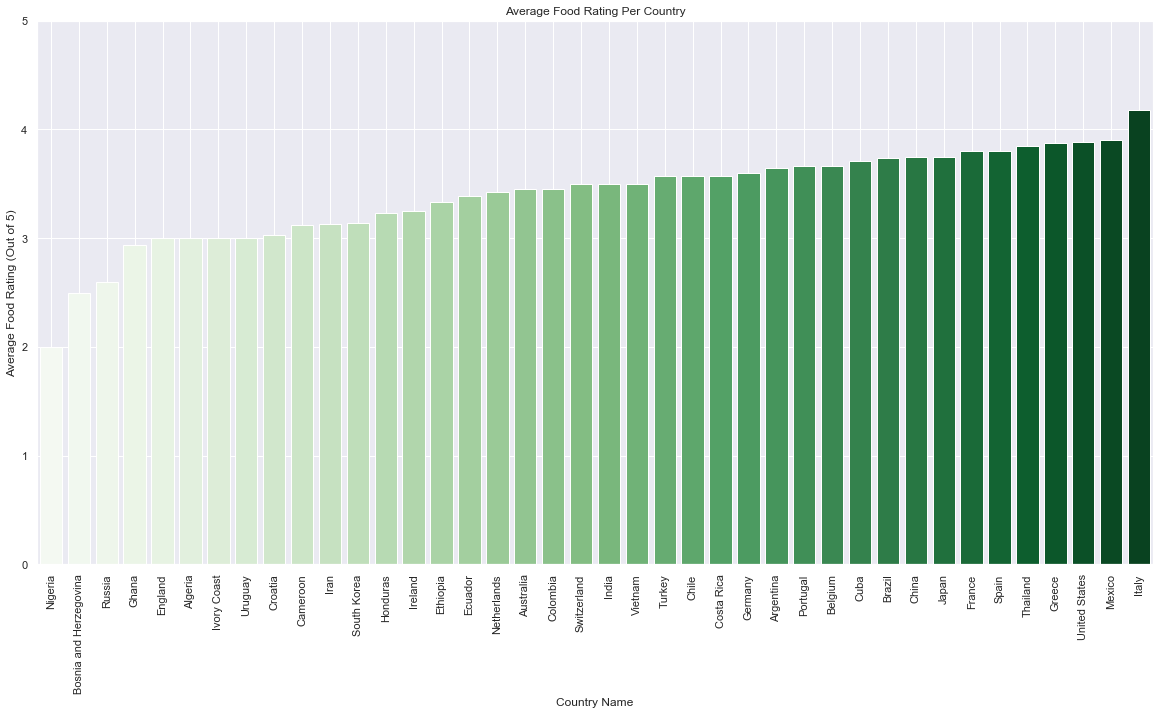

In [3]:
# average food rating per country, this shows the distribution of the data and the what the average person would answer
# for each country's food rating


avg_rating = np.mean(fwc[1:40]) # this calculates the mean of each column, but puts the values into an array 
#separately rather than just one value with all of them like pandas
avg_rating_sorted = np.sort(avg_rating) # this sorts the averages in ascending order to make the graph easier to interpret

plt.figure(figsize = (20,10)) # set the size of the plot larger, so it is easier to read
sns.set(style = "dark") # use a barplot to display this data, the column names(countries) is the x axis, 
barplot = sns.barplot(x = fwc_mean.columns[0:40], y = avg_rating_sorted, palette = "Greens") #and mean rating is the y axis
loc, labels = plt.xticks() #set the xtick values equal to labels, so I can change their position
barplot.set_xticklabels(labels, rotation = 90) # rotate the xtick labels by 90 degrees so they're readabel
barplot.set(ylim=(0,5)) # set the range of the y axis between 0 and 5 (the range of possibly answers)
plt.grid() #add a background grid to make it easier to see the differences in average ratings
barplot.set_xlabel("Country Name") # set the x axis name as country name
barplot.set_ylabel("Average Food Rating (Out of 5)") # set the y axis as average food rating (out of 5)
barplot.set_title("Average Food Rating Per Country") # set the title as average food rating per country

Text(0.5, 1.0, 'Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg)')

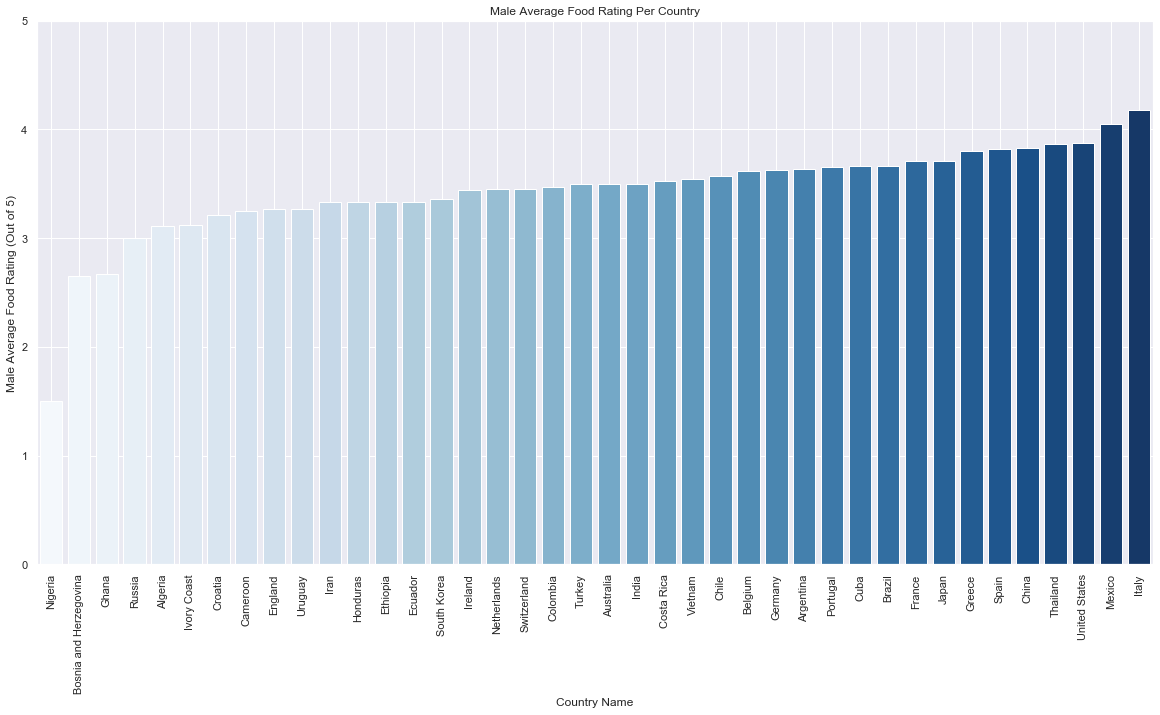

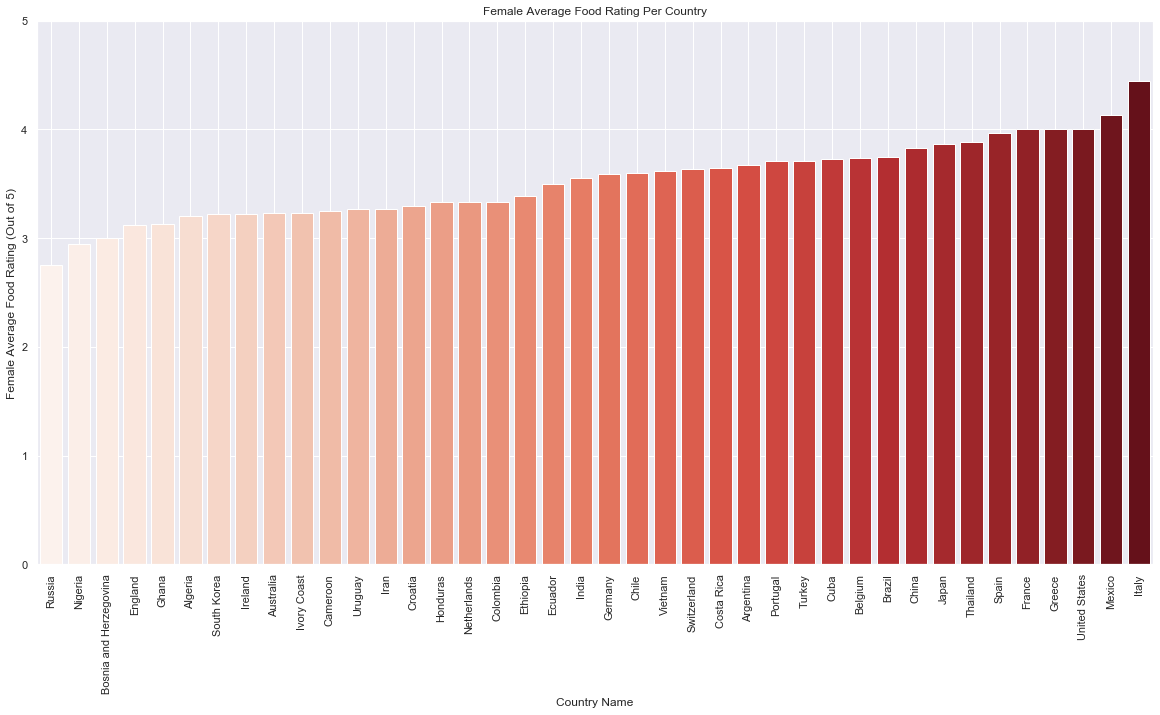

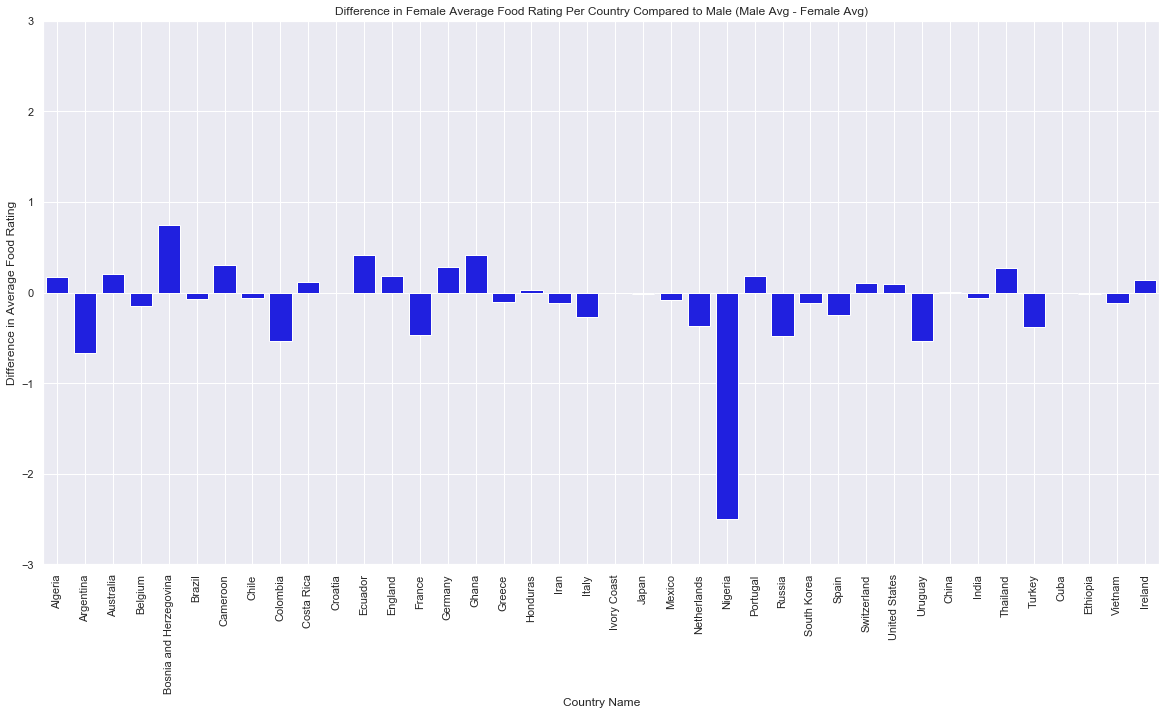

In [14]:
# HOW DOES GENDER AFFECT HOW A PERSON RATES EACH COUNTRY'S FOOD (OTHER THINGS EQUAL)?

# MASK AND CREATE NEW DF'S FOR GRAPHS
male_mask = fwc["Gender"] == "Male" #only answers where the person's gender is male
male_masked_frame = fwc[male_mask] #make a new data frame of only male answers

female_mask = fwc["Gender"] == "Female" #only answers where the person's gender is female
female_masked_frame = fwc[female_mask] #make a new data frame of only female answers

# MALE
average_male = np.mean(male_masked_frame[0:40]) #average rating per country in male df (for graph)
avg_male_sorted = np.sort(average_male) #sort average rating per country in male df by ascending order(for graph)
male_masked_frame.mean().sort_values() # sort average rating per country in male df by ascending order using pandas (for dataframe reindexing)
male_masked_frame = male_masked_frame.reindex(male_masked_frame.mean().sort_values().index, axis = 1) # reindex by average rating in ascending order
male_masked_frame.head() #.head() to make sure df looks how you expect after reindexing

# FEMALE
average_female = np.mean(female_masked_frame[0:40]) # average rating per country in female df (for graph)
avg_female_sorted = np.sort(average_female) #sort average rating per country in female df by ascending order (for graph)
female_masked_frame.mean().sort_values() # sort average rating per country in female df by aschending order using pandas (for reindexing)
female_masked_frame = female_masked_frame.reindex(female_masked_frame.mean().sort_values().index, axis = 1) # reindex by average raitng in ascending order
female_masked_frame.head() # .head() to make sure df looks how you expect after reindexing

# MALE BARPLOT
plt.figure(figsize = (20,10)) # set the size of the plot to compare male and female
sns.set(style = "dark") # use a barplot to display this data, the column names(countries) is the x axis, 
barplot_male = sns.barplot(x = male_masked_frame.columns[0:40], y = avg_male_sorted, palette = "Blues") #and mean rating is the y axis
loc, labels = plt.xticks() #set the xtick values equal to labels, so I can change their position
barplot_male.set_xticklabels(labels, rotation = 90) # rotate the xtick labels by 90 degrees so they're readabel
barplot_male.set(ylim=(0,5)) # set the range of the y axis between 0 and 5 (the range of possibly answers)
plt.grid() #add a background grid to make it easier to see the differences in average ratings
barplot_male.set_xlabel("Country Name") # set the x axis name as country name
barplot_male.set_ylabel("Male Average Food Rating (Out of 5)") # set the y axis as average food rating (out of 5)
barplot_male.set_title("Male Average Food Rating Per Country") # set the title as male average food rating per country

# FEMALE BARPLOT
plt.figure(figsize = (20,10)) # set the size of the plot to compare male and female
sns.set(style = "dark") # use a barplot to display this data, the column names(countries) is the x axis, 
barplot_female = sns.barplot(x = female_masked_frame.columns[0:40], y = avg_female_sorted, palette = "Reds") #and mean rating is the y axis
loc, labels = plt.xticks() #set the xtick values equal to labels, so I can change their position
barplot_female.set_xticklabels(labels, rotation = 90) # rotate the xtick labels by 90 degrees so they're readabel
barplot_female.set(ylim=(0,5)) # set the range of the y axis between 0 and 5 (the range of possibly answers)
plt.grid() #add a background grid to make it easier to see the differences in average ratings
barplot_female.set_xlabel("Country Name") # set the x axis name as country name
barplot_female.set_ylabel("Female Average Food Rating (Out of 5)") # set the y axis as average food rating (out of 5)
barplot_female.set_title("Female Average Food Rating Per Country") # set the title as female average food rating per country

# DIFFERENCE
male_female_diff = (average_male - average_female) #this is the difference between the average male rating and the 
# average female rating

plt.figure(figsize = (20,10)) # set the size of the plot larger to for better display
sns.set(style = "dark") # use a barplot to display this data, the column names(countries) is the x axis, 
barplot_male = sns.barplot(x = fwc.columns[0:40], y = male_female_diff, color = "Blue") #and  difference between mean rating is the y axis
loc, labels = plt.xticks() #set the xtick values equal to labels, so I can change their position
barplot_male.set_xticklabels(labels, rotation = 90) # rotate the xtick labels by 90 degrees so they're readabel
barplot_male.set(ylim=(-3,3)) # set the range of the y axis between -3,3 (the range of differences)
plt.grid() #add a background grid to make it easier to see the differences in average ratings
barplot_male.set_xlabel("Country Name") # set the x axis name as country name
barplot_male.set_ylabel("Difference in Average Food Rating") # set the y axis difference in average food rating
barplot_male.set_title("Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg)") # set the title as 
#Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg) 

**When looking at the male and female average ratings they're fairly similar, but there were a few things I noticed at the begining. Males had Thailand's and China's food in their top 5 (at 4 and 5), while Females had Greece's and France's (4 and 5) instead. Upon creating the comparison graph, I noticed the biggest differences seemed to be Females liking Nigeria's food much more than Males, and Males liking Bosnia and Herzegovina's food much better than Females, even though both of these countries were in the bottom 3 for both genders. I had trouble finding a good way to display the difference graph in a way that it is sorted, because the gender's had their own frames masked by mean and sorted in separate ways, so I chose to stay with the sorting of the original dataframe. While it is not ideal, you can still interpret it in the proper way, as a few countries had large differences in average rating by gender, while most of them had differences of less than +/- 1 or barely any difference at all.**

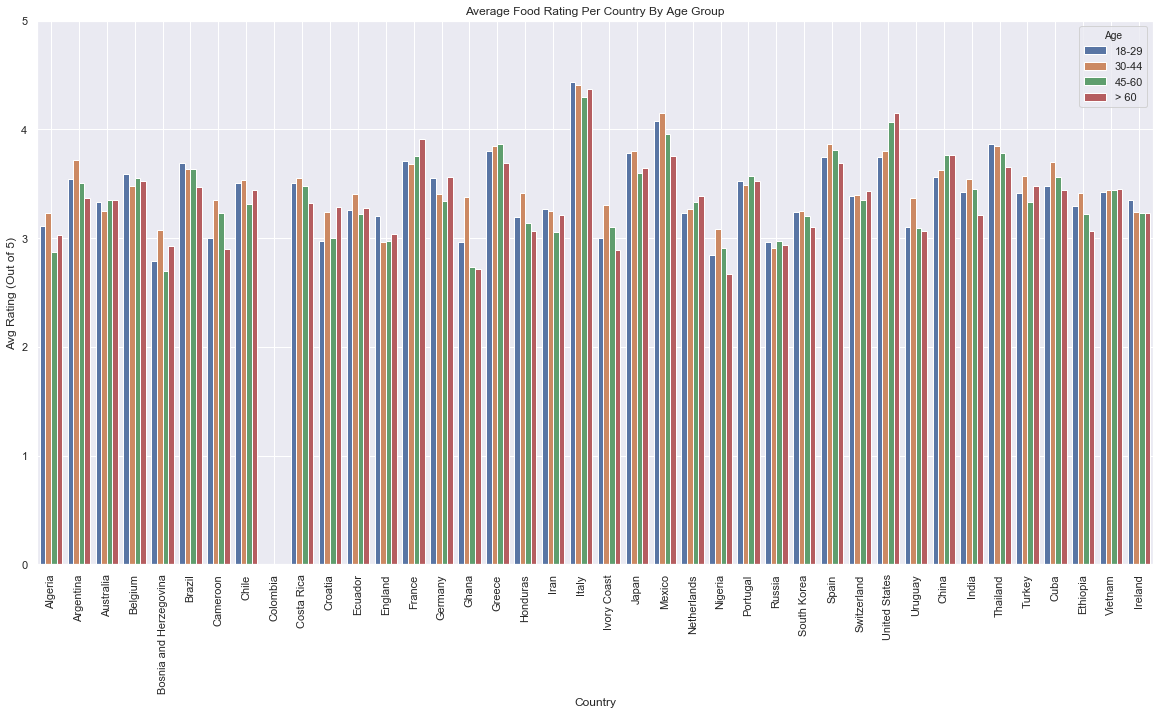

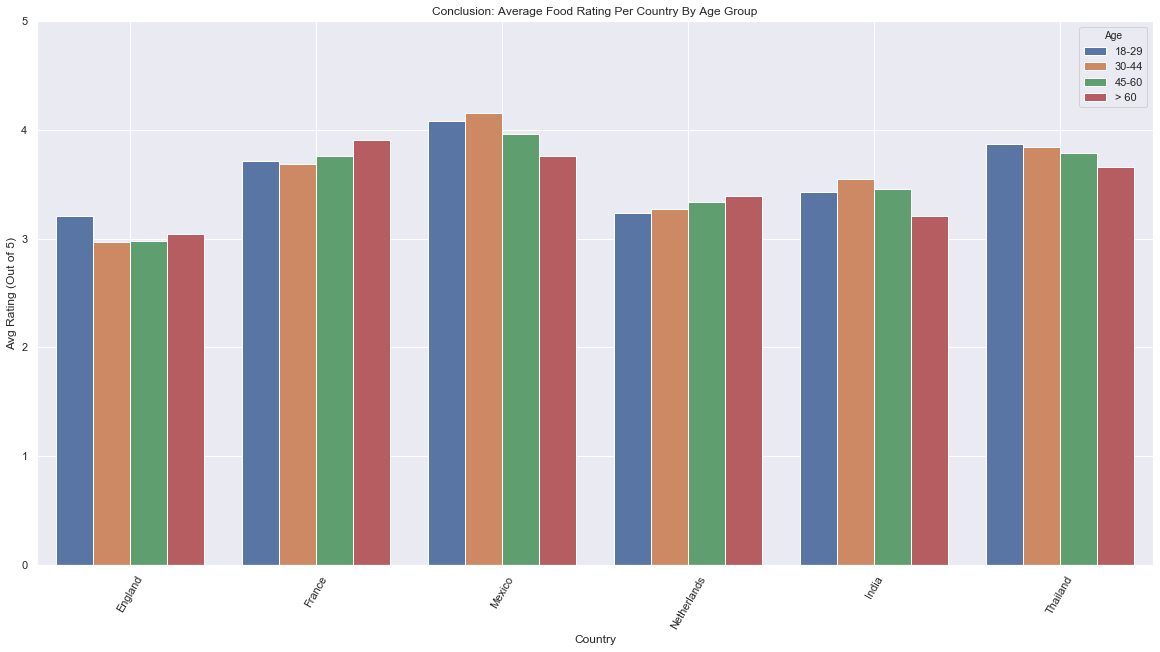

In [5]:
# HOW DOES AGE AFFECT HOW A PERSON RATES EACH COUNTRY'S FOOD (OTHER THINGS EQUAL)?

# MASK FWC DATAFRAME BY AGE GROUPS AND CREATE ARRAYS WITH MEAN RATINGS PER AGE GROUP
age_18 = fwc["Age"]=="18-29" # this masks the fwc dataframe by only those who answered 18-29 for age
mean_18 = np.array(np.mean(fwc[age_18])) # this is an array (better for new dataframe) of the average rating 
# per country for ages 18-29
age_30 = fwc["Age"]=="30-44" # this masks the fwc dataframe by only those who answered 30-44 for age
mean_30 = np.array(np.mean(fwc[age_30])) # this is an array (better for new dataframe) of the average rating 
# per country for ages 30-44
age_45 = fwc["Age"]=="45-60" # this masks the fwc dataframe by only those who answered 45-60 for age
mean_45 = np.array(np.mean(fwc[age_45])) # this is an array (better for new dataframe) of the average rating 
# per country for ages 45-60
age_60 = fwc["Age"]=="> 60" # this masks the fwc dataframe by only those who answered > 60 for age
mean_60 = np.array(np.mean(fwc[age_60])) # this is an array (better for new dataframe) of the average rating 
# per country for ages > 60

# CREATE NEW DICTIONARY FOR EASE OF MANIPULATION
age_data = {'Age': ['18-29','30-44','45-60','> 60'],
            'Algeria':[mean_18[0], mean_30[0], mean_45[0],mean_60[0]],
            'Argentina':[mean_18[1], mean_30[1], mean_45[1],mean_60[1]],
            'Australia':[mean_18[2], mean_30[2], mean_45[2],mean_60[2]],
            'Belgium':[mean_18[3], mean_30[3], mean_45[3],mean_60[3]],
            'Bosnia and Herzegovina':[mean_18[4], mean_30[4], mean_45[4],mean_60[4]],
            'Brazil':[mean_18[5], mean_30[5], mean_45[5],mean_60[5]],
            'Cameroon':[mean_18[6], mean_30[6], mean_45[6],mean_60[6]],
            'Chile':[mean_18[7], mean_30[7], mean_45[7],mean_60[7]],
            'Columbia':[mean_18[8], mean_30[8], mean_45[8],mean_60[8]],
            'Costa Rica':[mean_18[9], mean_30[9], mean_45[9],mean_60[9]],
            'Croatia':[mean_18[10], mean_30[10], mean_45[10],mean_60[10]],
            'Ecuador':[mean_18[11], mean_30[11], mean_45[11],mean_60[11]],
            'England':[mean_18[12], mean_30[12], mean_45[12],mean_60[12]],
            'France':[mean_18[13], mean_30[13], mean_45[13],mean_60[13]],
            'Germany':[mean_18[14], mean_30[14], mean_45[14],mean_60[14]],
            'Ghana':[mean_18[15], mean_30[15], mean_45[15],mean_60[15]],
            'Greece':[mean_18[16], mean_30[16], mean_45[16],mean_60[16]],
            'Honduras':[mean_18[17], mean_30[17], mean_45[17],mean_60[17]],
            'Iran':[mean_18[18], mean_30[18], mean_45[18],mean_60[18]],
            'Italy':[mean_18[19], mean_30[19], mean_45[19],mean_60[19]],
            'Ivory Coast':[mean_18[20], mean_30[20], mean_45[20],mean_60[20]],
            'Japan':[mean_18[21], mean_30[21], mean_45[21],mean_60[21]],
            'Mexico':[mean_18[22], mean_30[22], mean_45[22],mean_60[22]],
            'Netherlands':[mean_18[23], mean_30[23], mean_45[23],mean_60[23]],
            'Nigeria':[mean_18[24], mean_30[24], mean_45[24],mean_60[24]],
            'Portugal':[mean_18[25], mean_30[25], mean_45[25],mean_60[25]],
            'Russia':[mean_18[26], mean_30[26], mean_45[26],mean_60[26]],
            'South Korea':[mean_18[27], mean_30[27], mean_45[27],mean_60[27]],
            'Spain':[mean_18[28], mean_30[28], mean_45[28],mean_60[28]],
            'Switzerland':[mean_18[29], mean_30[29], mean_45[29],mean_60[29]],
            'United States':[mean_18[30], mean_30[30], mean_45[30],mean_60[30]],
            'Uruguay':[mean_18[31], mean_30[31], mean_45[31],mean_60[31]],
            'China':[mean_18[32], mean_30[32], mean_45[32],mean_60[32]],
            'India':[mean_18[33], mean_30[33], mean_45[33],mean_60[33]],
            'Thailand':[mean_18[34], mean_30[34], mean_45[34],mean_60[34]],
            'Turkey':[mean_18[35], mean_30[35], mean_45[35],mean_60[35]],
            'Cuba':[mean_18[36], mean_30[36], mean_45[36],mean_60[36]],
            'Ethiopia':[mean_18[37], mean_30[37], mean_45[37],mean_60[37]],
            'Vietnam':[mean_18[38], mean_30[38], mean_45[38],mean_60[38]],
            'Ireland':[mean_18[39], mean_30[39], mean_45[39],mean_60[39]],
           }
# created a new dictionary with the average rating per country for each age group, so I can do a seaborn grouped barplot
# new list of column names which are "Age" and all the country names
age_column_names = ["Age","Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay", "China", "India", "Thailand", "Turkey", "Cuba", "Ethiopia", "Vietnam", "Ireland"]

age = pd.DataFrame(age_data,columns = age_column_names) # use the newly created dictionary, and the list of column
# names I created to make a new dataframe called age, this data frame has age group as a column and the corresponding
# average rating per country, so I can use this dataframe to make a seaborn grouped barplot

age_melt = age.melt('Age',var_name='Country',value_name='Avg Rating (Out of 5)') # melt the age dataframe, so it is just 3 
#columns, the age, the variable (country) and the value (avg rating), this allows me to use the barplot and the hue argument properly

# plot of all countries
plt.figure(figsize = (20,10))
plot_age_melt = sns.barplot(x = age_melt['Country'], y = age_melt['Avg Rating (Out of 5)'], hue = age_melt['Age'])
loc, labels = plt.xticks()
plot_age_melt.set_xticklabels(labels, rotation = 90)
plt.grid()
plot_age_melt.set(ylim = (0,5))
plot_age_melt.set_title("Average Food Rating Per Country By Age Group")
plot_age_melt

# AGE CONCLUSION
# I BELEIVE THAT AS AGE INCREASES, THE AVERAGE RATING FOR COUNTRIES WITH TRADITIONALLY FLAVORFUL (SPICIER) FOODS WILL GO DOWN,
# WHILE THE AVERAGE RATING FOR COUNTRIES WITH TRADITIONALLY BLAND FOOD WILL GO UP
# focus on india, thailand, mexico, england, netherlands, france
# this masks the average values in all age groups of these countries: India, Thailand, Mexico, England, Netherlands, France
age_focus = (age_melt['Country'] == 'India') | (age_melt['Country'] == 'Thailand') | (age_melt['Country'] == 'Mexico') | (age_melt['Country'] == 'England') | (age_melt['Country'] == 'Netherlands') | (age_melt['Country'] == 'France')
age_conclusion = age_melt[age_focus]# this saves the new mask as a variable dataframe for graphing

plt.figure(figsize = (20,10))
plot_age_conclusion = sns.barplot(x = age_conclusion['Country'], y = age_conclusion['Avg Rating (Out of 5)'], hue = age_conclusion['Age'])
loc, labels = plt.xticks()
plot_age_conclusion.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_age_conclusion.set(ylim=(0,5))
plot_age_conclusion.set_title("Conclusion: Average Food Rating Per Country By Age Group")
plot_age_conclusion

**In conclusion, I have found a few things that appear to be noteworthy about how age affects the average rating of a country's food. The first trend I can see is that as age increases, a person's average rating for more flavorful food will go down and vice versa. The evidence of this is show with 3 countries with traditionally falvorful/spicy food: Mexico, India, and Thailand, as they follow the overall trend of average rating decreasing as the age group gets older. On the other hand, 3 countries with traditionally blander foods: England, France, Netherlands seem to have their average ratings increase as the age group gets older. Another, less consistent, trend I noticed is that the rating for the age group of 30-44 seems to be the highest for a large number of countries.**

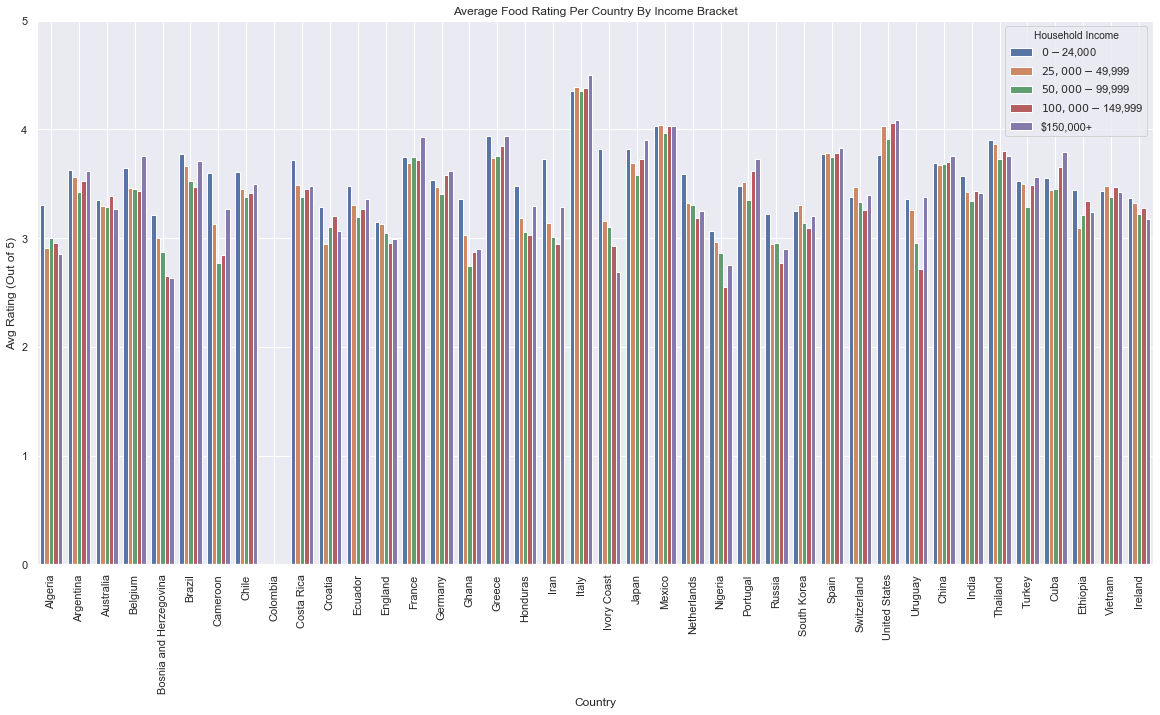

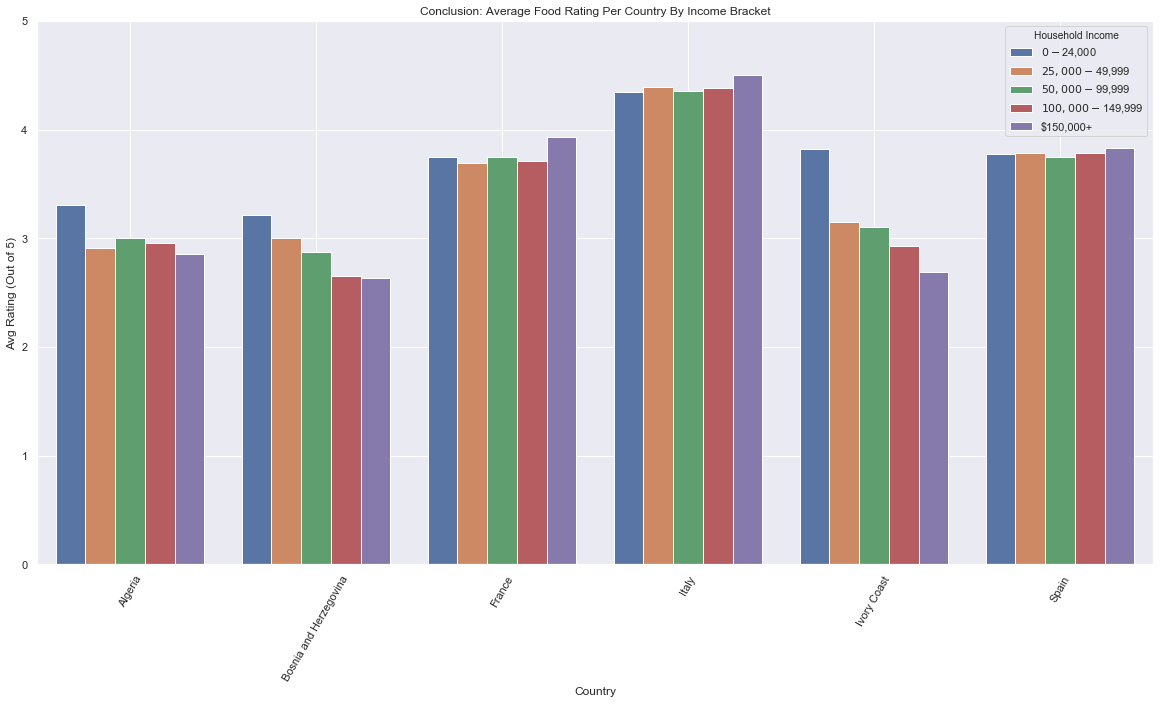

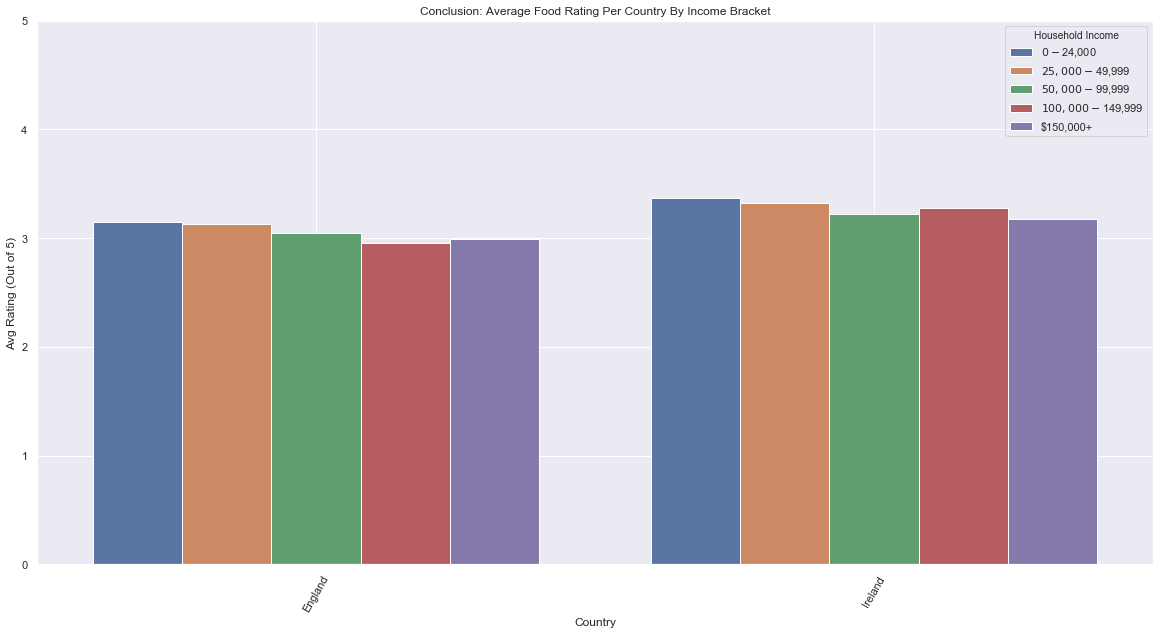

In [6]:
# HOW DOES HOUSEHOLD INCOME AFFECT HOW A PERSON RATES EACH COUNTRY'S FOOD (OTHER THINGS EQUAL)?

# MASK DATAFRAME BY HOUSEHOLD INCOME AND CREATE ARRAYS WITH MEAN RATINGS PER INCOME BRACKET
# $0-$24,999
zero = fwc["Household Income"]=="$0 - $24,999" # this masks the fwc dataframe by only those who answered $0-24,999 for household income
income_0 = np.array(np.mean(fwc[zero])) # this is an array (better for new dataframe) of the average rating
# $25k - $49,999
twenty_five = fwc["Household Income"] =="$25,000 - $49,999" # this masks the fwc dataframe by only those who answered $25,000-49,999 for household income
income_25 = np.array(np.mean(fwc[twenty_five])) # this is an array (better for new dataframe) of the average rating
# $50k - $99,999
fifty = fwc["Household Income"] == "$50,000 - $99,999" # this masks the fwc dataframe by only those who answered $50,000-99,999 for household income
income_50 = np.array(np.mean(fwc[fifty])) # this is an array (better for the new dataframe) of the average rating
# $100k - $149,999
one_hundred = fwc["Household Income"] == "$100,000 - $149,999" # this masks the fwc dataframe by only those who answered $100,000-149,999 for household income
income_100 = np.array(np.mean(fwc[one_hundred])) # this is an array (better for the new dataframe) of the average rating
# $150k +
one_fifty = fwc["Household Income"] == "$150,000+" # this masks the fwc dataframe by only those who answered $150,000+ for household income
income_150 = np.array(np.mean(fwc[one_fifty]))

# # CREATE NEW DICTIONARY FOR EASE OF MANIPULATION
income_data = {'Household Income': ['$0 - $24,000','$25,000 - $49,999','$50,000 - $99,999','$100,000 - $149,999','$150,000+'],
            'Algeria':[income_0[0], income_25[0], income_50[0],income_100[0], income_150[0]],
            'Argentina':[income_0[1], income_25[1], income_50[1],income_100[1], income_150[1]],
            'Australia':[income_0[2], income_25[2], income_50[2],income_100[2], income_150[2]],
            'Belgium':[income_0[3], income_25[3], income_50[3],income_100[3], income_150[3]],
            'Bosnia and Herzegovina':[income_0[4], income_25[4], income_50[4],income_100[4], income_150[4]],
            'Brazil':[income_0[5], income_25[5], income_50[5],income_100[5], income_150[5]],
            'Cameroon':[income_0[6], income_25[6], income_50[6],income_100[6], income_150[6]],
            'Chile':[income_0[7], income_25[7], income_50[7],income_100[7], income_150[7]],
            'Columbia':[income_0[8], income_25[8], income_50[8],income_100[8], income_150[8]],
            'Costa Rica':[income_0[9], income_25[9], income_50[9],income_100[9], income_150[9]],
            'Croatia':[income_0[10], income_25[10], income_50[10],income_100[10], income_150[10]],
            'Ecuador':[income_0[11], income_25[11], income_50[11],income_100[11], income_150[11]],
            'England':[income_0[12], income_25[12], income_50[12],income_100[12], income_150[12]],
            'France':[income_0[13], income_25[13], income_50[13],income_100[13], income_150[13]],
            'Germany':[income_0[14], income_25[14], income_50[14],income_100[14], income_150[14]],
            'Ghana':[income_0[15], income_25[15], income_50[15],income_100[15], income_150[15]],
            'Greece':[income_0[16], income_25[16], income_50[16],income_100[16], income_150[16]],
            'Honduras':[income_0[17], income_25[17], income_50[17],income_100[17], income_150[17]],
            'Iran':[income_0[18], income_25[18], income_50[18],income_100[18],income_150[18]],
            'Italy':[income_0[19], income_25[19], income_50[19],income_100[19],income_150[19]],
            'Ivory Coast':[income_0[20], income_25[20], income_50[20],income_100[20], income_150[20]],
            'Japan':[income_0[21], income_25[21], income_50[21],income_100[21], income_150[21]],
            'Mexico':[income_0[22], income_25[22], income_50[22],income_100[22], income_150[22]],
            'Netherlands':[income_0[23], income_25[23], income_50[23],income_100[23], income_150[23]],
            'Nigeria':[income_0[24], income_25[24], income_50[24],income_100[24], income_150[24]],
            'Portugal':[income_0[25], income_25[25], income_50[25],income_100[25], income_150[25]],
            'Russia':[income_0[26], income_25[26], income_50[26],income_100[26], income_150[26]],
            'South Korea':[income_0[27], income_25[27], income_50[27],income_100[27], income_150[27]],
            'Spain':[income_0[28], income_25[28], income_50[28],income_100[28], income_150[28]],
            'Switzerland':[income_0[29], income_25[29], income_50[29],income_100[29], income_150[29]],
            'United States':[income_0[30], income_25[30], income_50[30],income_100[30],income_150[30]],
            'Uruguay':[income_0[31], income_25[31], income_50[31],income_100[31],income_150[31]],
            'China':[income_0[32], income_25[32], income_50[32],income_100[32],income_150[32]],
            'India':[income_0[33], income_25[33], income_50[33],income_100[33],income_150[33]],
            'Thailand':[income_0[34], income_25[34], income_50[34],income_100[34],income_150[34]],
            'Turkey':[income_0[35], income_25[35], income_50[35],income_100[35],income_150[35]],
            'Cuba':[income_0[36], income_25[36], income_50[36],income_100[36],income_150[36]],
            'Ethiopia':[income_0[37], income_25[37], income_50[37],income_100[37],income_150[37]],
            'Vietnam':[income_0[38], income_25[38], income_50[38],income_100[38],income_150[38]],
            'Ireland':[income_0[39], income_25[39], income_50[39],income_100[39],income_150[39]],
           }
# created a new dictionary with the average rating per country for each income bracket, so I can do a seaborn grouped barplot
# new list of column names which are "Household Income" and all the country names
income_column_names = ["Household Income","Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay", "China", "India", "Thailand", "Turkey", "Cuba", "Ethiopia", "Vietnam", "Ireland"]

income = pd.DataFrame(income_data, columns = income_column_names)# use the newly created dictionary, and the list of column
# names I created to make a new dataframe called income, this data frame has income bracket as a column and the corresponding
# average rating per country, so I can use this dataframe to make a seaborn grouped barplot


income_melt = income.melt('Household Income',var_name='Country',value_name='Avg Rating (Out of 5)') # melt the income dataframe, so it is just 3 
#columns, the income bracket, the variable (country) and the value (avg rating), this allows me to use the barplot and the hue argument properly

# plot of all countries
plt.figure(figsize = (20,10))
plot_income_melt = sns.barplot(x = income_melt['Country'], y = income_melt['Avg Rating (Out of 5)'], hue = income_melt['Household Income'])
loc, labels = plt.xticks()
plot_income_melt.set_xticklabels(labels, rotation = 90)
plt.grid()
plot_income_melt.set(ylim = (0,5))
plot_income_melt.set_title("Average Food Rating Per Country By Income Bracket")
plot_income_melt

#I BELIEVE AS INCOME BRACKET INCREASES THE AVERAGE RATING FOR COUNTRIES THAT ARE TRAVEL DESTINATIONS WILL INCREASE,
# WHILE THE AVERAGE RATING FOR COUNTRIES THAT AREN'T GENERALLY TRAVEL DESTINATIOSN WILL DECREASE
# focus on: italy, france, spain, bosnia and herzegovina, algeria, ivory coast
income_focus = (income_melt['Country'] == 'Italy') | (income_melt['Country'] == 'France') | (income_melt['Country'] == 'Bosnia and Herzegovina') | (income_melt['Country'] == 'Algeria') | (income_melt['Country'] == 'Ivory Coast') | (income_melt['Country'] == 'Spain')
income_conclusion = income_melt[income_focus]# this saves the new mask as a variable dataframe for graphing

plt.figure(figsize = (20,10))
plot_income_conclusion = sns.barplot(x = income_conclusion['Country'], y = income_conclusion['Avg Rating (Out of 5)'], hue = income_conclusion['Household Income'])
loc, labels = plt.xticks()
plot_income_conclusion.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_income_conclusion.set(ylim=(0,5))
plot_income_conclusion.set_title("Conclusion: Average Food Rating Per Country By Income Bracket")
plot_income_conclusion

#not great proof however, england and ireland are frequently tourist destinations, and theyre the opposite 
income_focus2 = (income_melt['Country'] == 'England') | (income_melt['Country'] == 'Ireland')
income_opposite = income_melt[income_focus2]

plt.figure(figsize = (20,10))
plot_income_opposite = sns.barplot(x = income_opposite['Country'], y = income_opposite['Avg Rating (Out of 5)'], hue = income_opposite['Household Income'])
loc, labels = plt.xticks()
plot_income_opposite.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_income_opposite.set(ylim=(0,5))
plot_income_opposite.set_title("Conclusion: Average Food Rating Per Country By Income Bracket")
plot_income_opposite

**In conclusion, I found that my hypothesis was not entirely supported but there were a few instances that it was. I thought that countries that are more highly regarded as tourist locations would see an increase in average rating as a person's income bracket went up (because traveling is expensive). This was supported in a few instances (France, Italy, Spain) but some of the top tourist locations (England, Ireland) either had no real trend, or had the opposite trend. This is due to the fact that there are other factors that affect both average rating and level of tourism.**

Text(0.5, 1.0, 'Conclusion: Average Food Rating Per Country By New England Region')

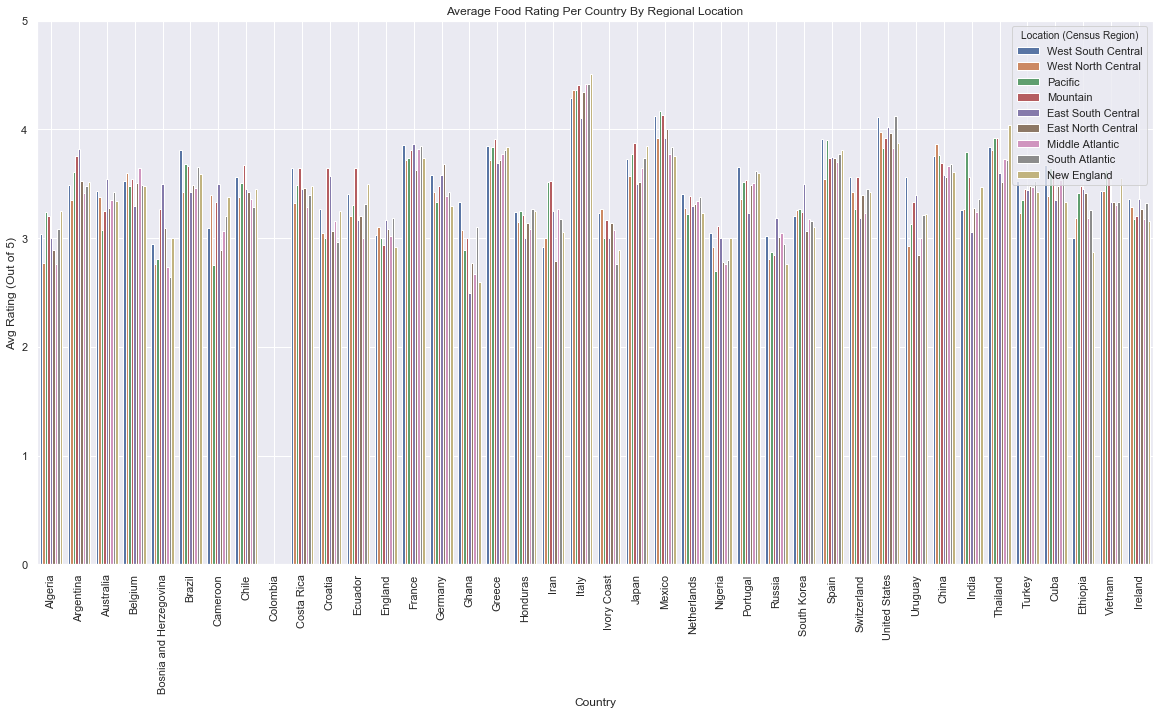

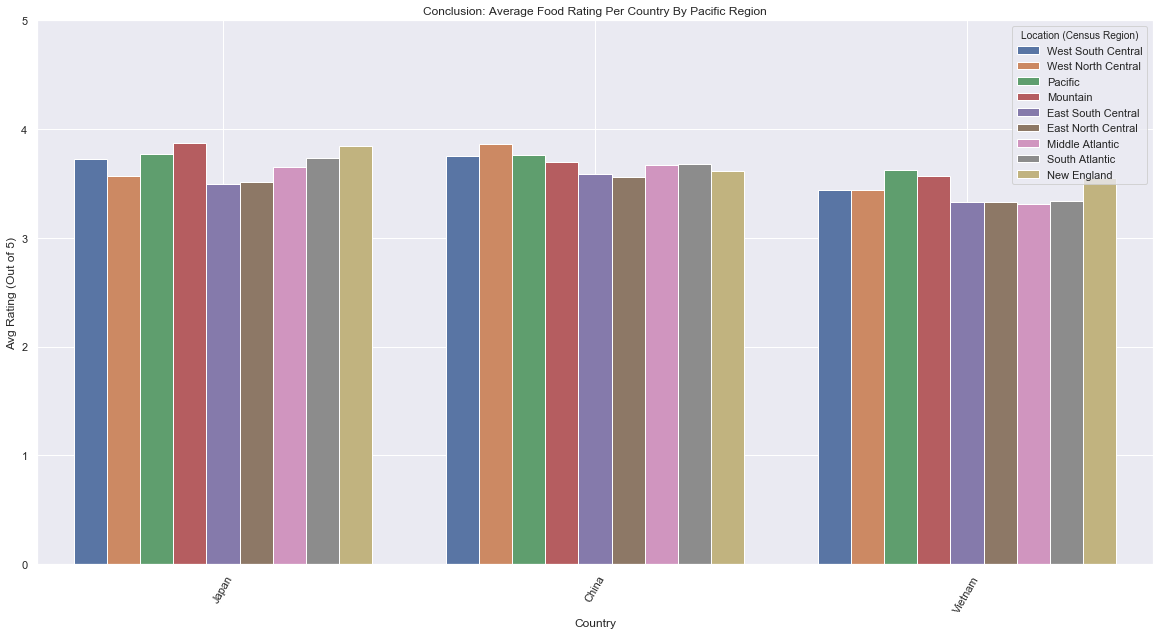

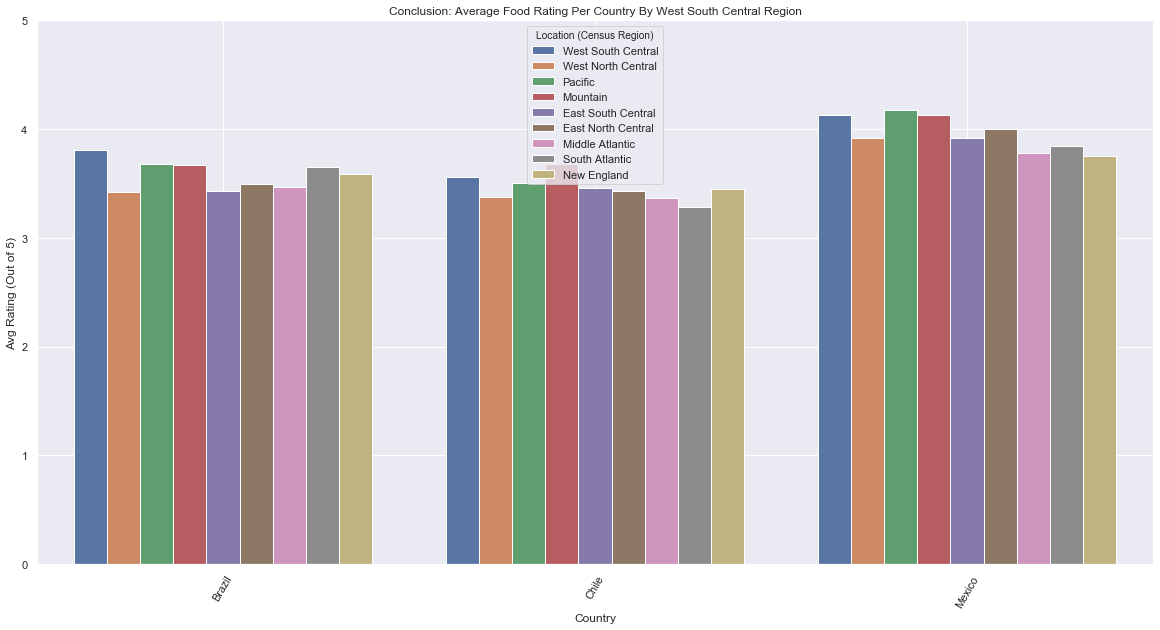

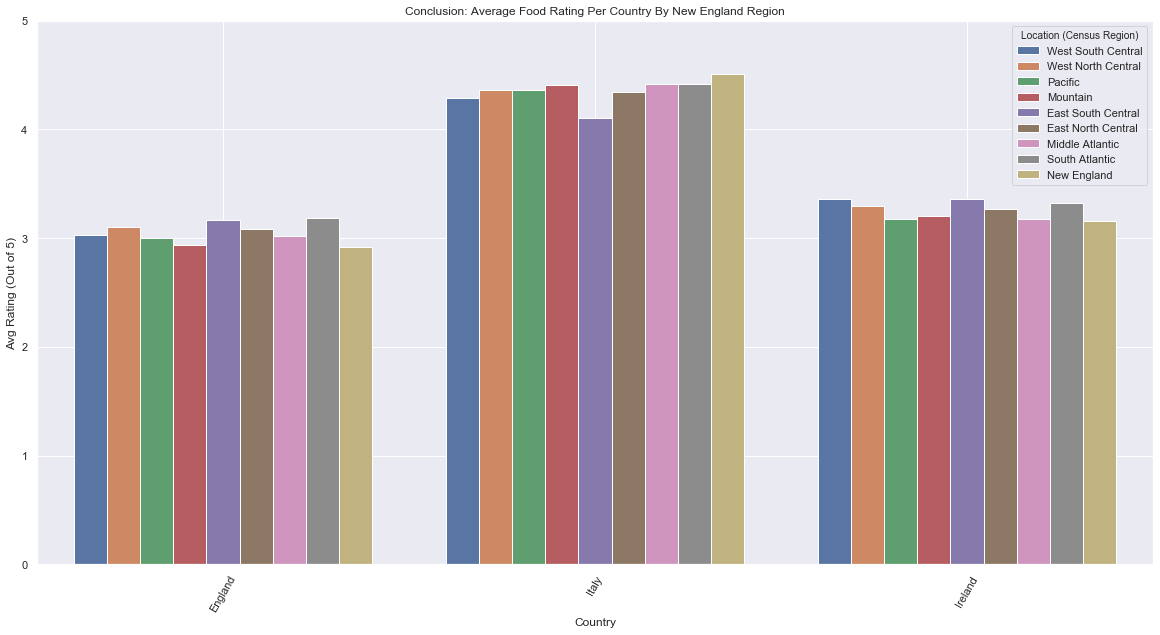

In [11]:
# HOW DOES LOCATION AFFECT HOW A PERSON RATES EACH COUNTRY'S FOOD (OTHER THINGS EQUAL)?

# MASK DATAFRAME BY LOCATION IN US AND CREATE ARRAYS WITH MEAN RATINGS PER CENSUS REGION
# west south central
wsc = fwc["Location (Census Region)"]=="West South Central" # this masks the fwc dataframe by only those who answered west south central for regional location
mean_wsc = np.array(np.mean(fwc[wsc])) # this is an array (better for new dataframe) of the average rating
# west north central
wnc = fwc["Location (Census Region)"]=="West North Central" # this masks the fwc dataframe by only those who answered west north central for regionaly location
mean_wnc = np.array(np.mean(fwc[wnc])) # this is an array (better for new dataframe) of the average rating
# pacific
p = fwc["Location (Census Region)"]=="Pacific" # this masks the fwc dataframe by only those who answered pacific for regionaly location
mean_p = np.array(np.mean(fwc[p])) # this is an array (better for new dataframe) of the average rating
# mountain
m = fwc["Location (Census Region)"]=="Mountain" # this masks the fwc dataframe by only those who answered moutain for regionaly location
mean_m = np.array(np.mean(fwc[m])) # this is an array (better for new dataframe) of the average rating
# east south central
esc = fwc["Location (Census Region)"]=="East South Central" # this masks the fwc dataframe by only those who answered east south central for regionaly location
mean_esc = np.array(np.mean(fwc[esc])) # this is an array (better for new dataframe) of the average rating
# east north central
enc = fwc["Location (Census Region)"]=="East North Central" # this masks the fwc dataframe by only those who answered east north central for regionaly location
mean_enc = np.array(np.mean(fwc[enc])) # this is an array (better for new dataframe) of the average rating
# middle atlantic
ma = fwc["Location (Census Region)"]=="Middle Atlantic" # this masks the fwc dataframe by only those who answered middle atlantc for regionaly location
mean_ma = np.array(np.mean(fwc[ma])) # this is an array (better for new dataframe) of the average rating
# south atlantic
sa = fwc["Location (Census Region)"]=="South Atlantic" # this masks the fwc dataframe by only those who answered South Atlantic for regionaly location
mean_sa = np.array(np.mean(fwc[sa])) # this is an array (better for new dataframe) of the average rating
# new england
ne = fwc["Location (Census Region)"]=="New England" # this masks the fwc dataframe by only those who answered new england for regionaly location
mean_ne = np.array(np.mean(fwc[ne])) # this is an array (better for new dataframe) of the average rating


# CREATE NEW DICTIONARY FOR EASE OF MANIPULATION
region_data = {'Location (Census Region)': ['West South Central','West North Central','Pacific','Mountain', 'East South Central','East North Central', 'Middle Atlantic', 'South Atlantic', 'New England'],
            'Algeria':[mean_wsc[0], mean_wnc[0], mean_p[0],mean_m[0], mean_esc[0], mean_enc[0], mean_ma[0], mean_sa[0], mean_ne[0]],
            'Argentina':[mean_wsc[1], mean_wnc[1], mean_p[1],mean_m[1], mean_esc[1], mean_enc[1], mean_ma[1], mean_sa[1], mean_ne[1]],
            'Australia':[mean_wsc[2], mean_wnc[2], mean_p[2],mean_m[2], mean_esc[2], mean_enc[2], mean_ma[2], mean_sa[2], mean_ne[2]],
            'Belgium':[mean_wsc[3], mean_wnc[3], mean_p[3],mean_m[3], mean_esc[3], mean_enc[3], mean_ma[3], mean_sa[3], mean_ne[3]],
            'Bosnia and Herzegovina':[mean_wsc[4], mean_wnc[4], mean_p[4],mean_m[4], mean_esc[4], mean_enc[4], mean_ma[4], mean_sa[4], mean_ne[4]],
            'Brazil':[mean_wsc[5], mean_wnc[5], mean_p[5],mean_m[5], mean_esc[5], mean_enc[5], mean_ma[5], mean_sa[5], mean_ne[5]],
            'Cameroon':[mean_wsc[6], mean_wnc[6], mean_p[6],mean_m[6], mean_esc[6], mean_enc[6], mean_ma[6], mean_sa[6], mean_ne[6]],
            'Chile':[mean_wsc[7], mean_wnc[7], mean_p[7],mean_m[7], mean_esc[7], mean_enc[7], mean_ma[7], mean_sa[7], mean_ne[7]],
            'Columbia':[mean_wsc[8], mean_wnc[8], mean_p[8],mean_m[8], mean_esc[8], mean_enc[8], mean_ma[8], mean_sa[8], mean_ne[8]],
            'Costa Rica':[mean_wsc[9], mean_wnc[9], mean_p[9],mean_m[9], mean_esc[9], mean_enc[9], mean_ma[9], mean_sa[9], mean_ne[9]],
            'Croatia':[mean_wsc[10], mean_wnc[10], mean_p[10],mean_m[10], mean_esc[10], mean_enc[10], mean_ma[10], mean_sa[10], mean_ne[10]],
            'Ecuador':[mean_wsc[11], mean_wnc[11], mean_p[11],mean_m[11], mean_esc[11], mean_enc[11], mean_ma[11], mean_sa[11], mean_ne[11]],
            'England':[mean_wsc[12], mean_wnc[12], mean_p[10],mean_m[12], mean_esc[12], mean_enc[12], mean_ma[12], mean_sa[12], mean_ne[12]],
            'France':[mean_wsc[13], mean_wnc[13], mean_p[13],mean_m[13], mean_esc[13], mean_enc[13], mean_ma[13], mean_sa[13], mean_ne[13]],
            'Germany':[mean_wsc[14], mean_wnc[14], mean_p[14],mean_m[14], mean_esc[14], mean_enc[14], mean_ma[14], mean_sa[14], mean_ne[14]],
            'Ghana':[mean_wsc[15], mean_wnc[15], mean_p[15],mean_m[15], mean_esc[15], mean_enc[15], mean_ma[15], mean_sa[15], mean_ne[15]],
            'Greece':[mean_wsc[16], mean_wnc[16], mean_p[16],mean_m[16], mean_esc[16], mean_enc[16], mean_ma[16], mean_sa[16], mean_ne[16]],
            'Honduras':[mean_wsc[17], mean_wnc[17], mean_p[17],mean_m[17], mean_esc[17], mean_enc[17], mean_ma[17], mean_sa[17], mean_ne[17]],
            'Iran':[mean_wsc[18], mean_wnc[18], mean_p[18],mean_m[18], mean_esc[18], mean_enc[18], mean_ma[18], mean_sa[18], mean_ne[18]],
            'Italy':[mean_wsc[19], mean_wnc[19], mean_p[19],mean_m[19], mean_esc[19], mean_enc[19], mean_ma[19], mean_sa[19], mean_ne[19]],
            'Ivory Coast':[mean_wsc[20], mean_wnc[20], mean_p[20],mean_m[20], mean_esc[20], mean_enc[20], mean_ma[20], mean_sa[20], mean_ne[20]],
            'Japan':[mean_wsc[21], mean_wnc[21], mean_p[21],mean_m[21], mean_esc[21], mean_enc[21], mean_ma[21], mean_sa[21], mean_ne[21]],
            'Mexico':[mean_wsc[22], mean_wnc[22], mean_p[22],mean_m[22], mean_esc[22], mean_enc[22], mean_ma[22], mean_sa[22], mean_ne[22]],
            'Netherlands':[mean_wsc[23], mean_wnc[23], mean_p[23],mean_m[23], mean_esc[23], mean_enc[23], mean_ma[23], mean_sa[23], mean_ne[23]],
            'Nigeria':[mean_wsc[24], mean_wnc[24], mean_p[24],mean_m[24], mean_esc[24], mean_enc[24], mean_ma[24], mean_sa[24], mean_ne[24]],
            'Portugal':[mean_wsc[25], mean_wnc[25], mean_p[25],mean_m[25], mean_esc[25], mean_enc[25], mean_ma[25], mean_sa[25], mean_ne[25]],
            'Russia':[mean_wsc[26], mean_wnc[26], mean_p[26],mean_m[26], mean_esc[26], mean_enc[26], mean_ma[26], mean_sa[26], mean_ne[26]],
            'South Korea':[mean_wsc[27], mean_wnc[27], mean_p[27],mean_m[27], mean_esc[27], mean_enc[27], mean_ma[27], mean_sa[27], mean_ne[27]],
            'Spain':[mean_wsc[28], mean_wnc[28], mean_p[28],mean_m[28], mean_esc[28], mean_enc[28], mean_ma[28], mean_sa[28], mean_ne[28]],
            'Switzerland':[mean_wsc[29], mean_wnc[29], mean_p[29],mean_m[29], mean_esc[29], mean_enc[29], mean_ma[29], mean_sa[29], mean_ne[29]],
            'United States':[mean_wsc[30], mean_wnc[30], mean_p[30],mean_m[30], mean_esc[30], mean_enc[30], mean_ma[30], mean_sa[30], mean_ne[30]],
            'Uruguay':[mean_wsc[31], mean_wnc[31], mean_p[31],mean_m[31], mean_esc[31], mean_enc[31], mean_ma[31], mean_sa[31], mean_ne[31]],
            'China':[mean_wsc[32], mean_wnc[32], mean_p[32],mean_m[32], mean_esc[32], mean_enc[32], mean_ma[32], mean_sa[32], mean_ne[32]],
            'India':[mean_wsc[33], mean_wnc[33], mean_p[33],mean_m[33], mean_esc[33], mean_enc[33], mean_ma[33], mean_sa[33], mean_ne[33]],
            'Thailand':[mean_wsc[34], mean_wnc[34], mean_p[34],mean_m[34], mean_esc[34], mean_enc[34], mean_ma[34], mean_sa[34], mean_ne[34]],
            'Turkey':[mean_wsc[35], mean_wnc[35], mean_p[35],mean_m[35], mean_esc[35], mean_enc[35], mean_ma[35], mean_sa[35], mean_ne[35]],
            'Cuba':[mean_wsc[36], mean_wnc[36], mean_p[36],mean_m[36], mean_esc[36], mean_enc[36], mean_ma[36], mean_sa[36], mean_ne[36]],
            'Ethiopia':[mean_wsc[37], mean_wnc[37], mean_p[37],mean_m[37], mean_esc[37], mean_enc[37], mean_ma[37], mean_sa[37], mean_ne[37]],
            'Vietnam':[mean_wsc[38], mean_wnc[38], mean_p[38],mean_m[38], mean_esc[38], mean_enc[38], mean_ma[38], mean_sa[38], mean_ne[38]],
            'Ireland':[mean_wsc[39], mean_wnc[39], mean_p[39],mean_m[39], mean_esc[39], mean_enc[39], mean_ma[39], mean_sa[39], mean_ne[39]],
           }
# # created a new dictionary with the average rating per country for each census region, so I can do a seaborn grouped barplot
# new list of column names which are "Location (Census Region)" and all the country names
region_column_names = ["Location (Census Region)","Algeria", "Argentina", "Australia", "Belgium", "Bosnia and Herzegovina", "Brazil", "Cameroon", "Chile", "Colombia", "Costa Rica", "Croatia", "Ecuador", "England", "France", "Germany", "Ghana", "Greece", "Honduras", "Iran", "Italy", "Ivory Coast", "Japan", "Mexico", "Netherlands", "Nigeria", "Portugal", "Russia", "South Korea", "Spain", "Switzerland", "United States", "Uruguay", "China", "India", "Thailand", "Turkey", "Cuba", "Ethiopia", "Vietnam", "Ireland"]

region = pd.DataFrame(region_data, columns = region_column_names)# use the newly created dictionary, and the list of column
# names I created to make a new dataframe called region, this data frame has regional location as a column and the corresponding
# average rating per country, so I can use this dataframe to make a seaborn grouped barplot


region_melt = region.melt('Location (Census Region)',var_name='Country',value_name='Avg Rating (Out of 5)') # melt the region dataframe, so it is just 3 
#columns, the regional location, the variable (country) and the value (avg rating), this allows me to use the barplot and the hue argument properly

# plot of all countries
plt.figure(figsize = (20,10))
plot_region_melt = sns.barplot(x = region_melt['Country'], y = region_melt['Avg Rating (Out of 5)'], hue = region_melt['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_melt.set_xticklabels(labels, rotation = 90)
plt.grid()
plot_region_melt.set(ylim = (0,5))
plot_region_melt.set_title("Average Food Rating Per Country By Regional Location")
plot_region_melt



# I BELIEVE THAT REGIONAL LOCATION HAS AN EFFECT ON WHICH FOODS A PERSON RATES HIGHER, DUE TO CLOSENESS TO THE COUNTRY
# OF INTEREST, AND POPULATION OF IMMIGRANTS/ANCESTORS OF THE COUNTRY OF INTEREST IN THAT US REGION
# I will look at... pacific: japan, china, vietnam ... west south central: mexico, brazil, chile ...
# ... new england: ireland, italy, england
region_focus_pacific = (region_melt['Country'] == 'Japan') | (region_melt['Country'] == 'China') | (region_melt['Country'] == 'Vietnam')
region_conclusion_pacific = region_melt[region_focus_pacific]# this saves the new mask as a variable dataframe for graphing

plt.figure(figsize = (20,10))
plot_region_pacific = sns.barplot(x = region_conclusion_pacific['Country'], y = region_conclusion_pacific['Avg Rating (Out of 5)'], hue = region_conclusion_pacific['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_pacific.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_pacific.set(ylim=(0,5))
plot_region_pacific.set_title("Conclusion: Average Food Rating Per Country By Pacific Region")


region_focus_wsc = (region_melt['Country'] == 'Mexico') | (region_melt['Country'] == 'Brazil') | (region_melt['Country'] == 'Chile')
region_conclusion_wsc = region_melt[region_focus_wsc]# this saves the new mask as a variable dataframe for graphing

plt.figure(figsize = (20,10))
plot_region_wsc = sns.barplot(x = region_conclusion_wsc['Country'], y = region_conclusion_wsc['Avg Rating (Out of 5)'], hue = region_conclusion_wsc['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_wsc.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_wsc.set(ylim=(0,5))
plot_region_wsc.set_title("Conclusion: Average Food Rating Per Country By West South Central Region")

region_focus_ne = (region_melt['Country'] == 'Ireland') | (region_melt['Country'] == 'Italy') | (region_melt['Country'] == 'England')
region_conclusion_ne = region_melt[region_focus_ne]# this saves the new mask as a variable dataframe for graphing

plt.figure(figsize = (20,10))
plot_region_ne = sns.barplot(x = region_conclusion_ne['Country'], y = region_conclusion_ne['Avg Rating (Out of 5)'], hue = region_conclusion_ne['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_ne.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_ne.set(ylim=(0,5))
plot_region_ne.set_title("Conclusion: Average Food Rating Per Country By New England Region")

**Overall, it turned out that regions did not really play a large factor in the average ratings of countries closer to that US region. This is shown with a few regions and some countries that are closest to that US region, and/or have a larger population of people whose ancestors came from that country than the rest of the US regions. The main trends that supported my hypotheses were that hispanic country's foods seemed to be rated higher in the west south central region, but asian foods didn't have much of a trend in the pacific region and neither did european foods in the new england region.**

## Results

_I found that in the case of gender the ratings very fairly similar, although there were a few countries that one gender liked the food much more than the other. This is shown in the difference graph I made which was made by subtracting the average female rating from the average male rating (avg male rating - avg female rating = difference)._

Text(0.5, 1.0, 'Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg)')

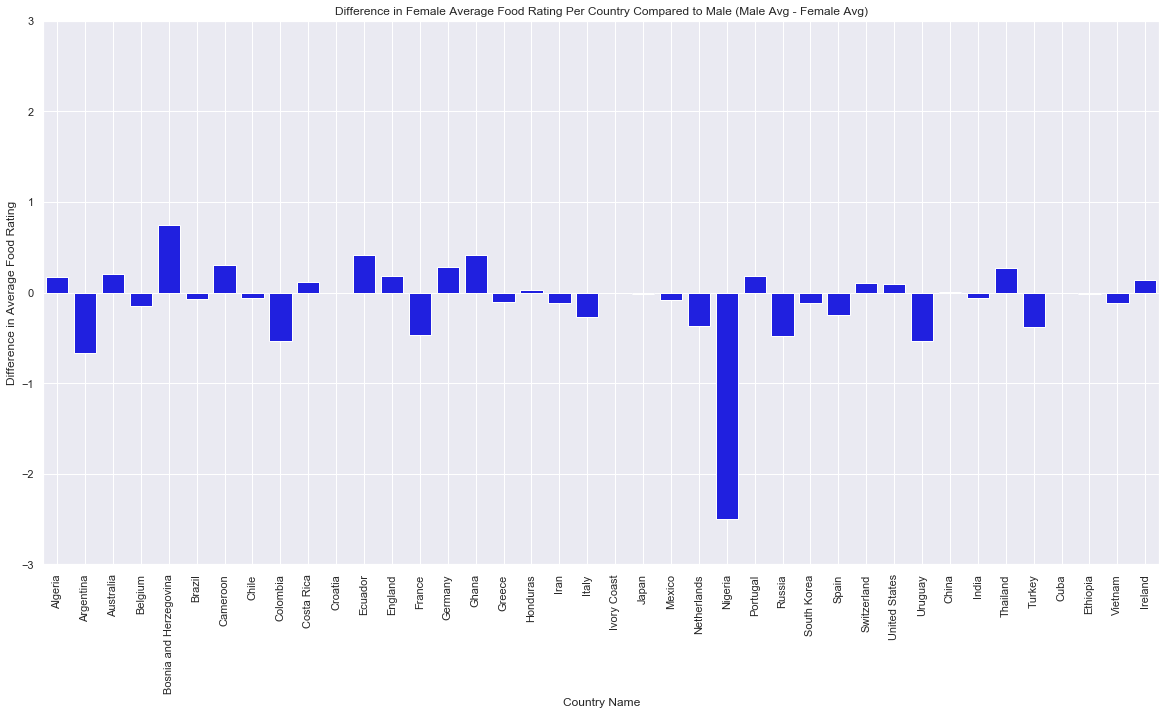

In [8]:
plt.figure(figsize = (20,10)) # set the size of the plot larger to for better display
sns.set(style = "dark") # use a barplot to display this data, the column names(countries) is the x axis, 
barplot_male = sns.barplot(x = fwc.columns[0:40], y = male_female_diff, color = "Blue") #and  difference between mean rating is the y axis
loc, labels = plt.xticks() #set the xtick values equal to labels, so I can change their position
barplot_male.set_xticklabels(labels, rotation = 90) # rotate the xtick labels by 90 degrees so they're readabel
barplot_male.set(ylim=(-3,3)) # set the range of the y axis between -3,3 (the range of differences)
plt.grid() #add a background grid to make it easier to see the differences in average ratings
barplot_male.set_xlabel("Country Name") # set the x axis name as country name
barplot_male.set_ylabel("Difference in Average Food Rating") # set the y axis difference in average food rating
barplot_male.set_title("Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg)") # set the title as 
#Difference in Female Average Food Rating Per Country Compared to Male (Male Avg - Female Avg) 

_In the case of age groups, I was able to find some cases to support my hypothesis that as you get older you tend to like country's foods that are more flavorful or spicy less. I was able to see that trend in Mexico, Thailand, and India. This isn't necessarily conclusive evidence however, as you don't know which specific dishes these people have had and I'm simply just making a lot of assumptions to hold all factors besides flavor/spice level equal. It was nice to see this trend and to have some evidence to back up my hypothesis even though it's not truly conclusive._

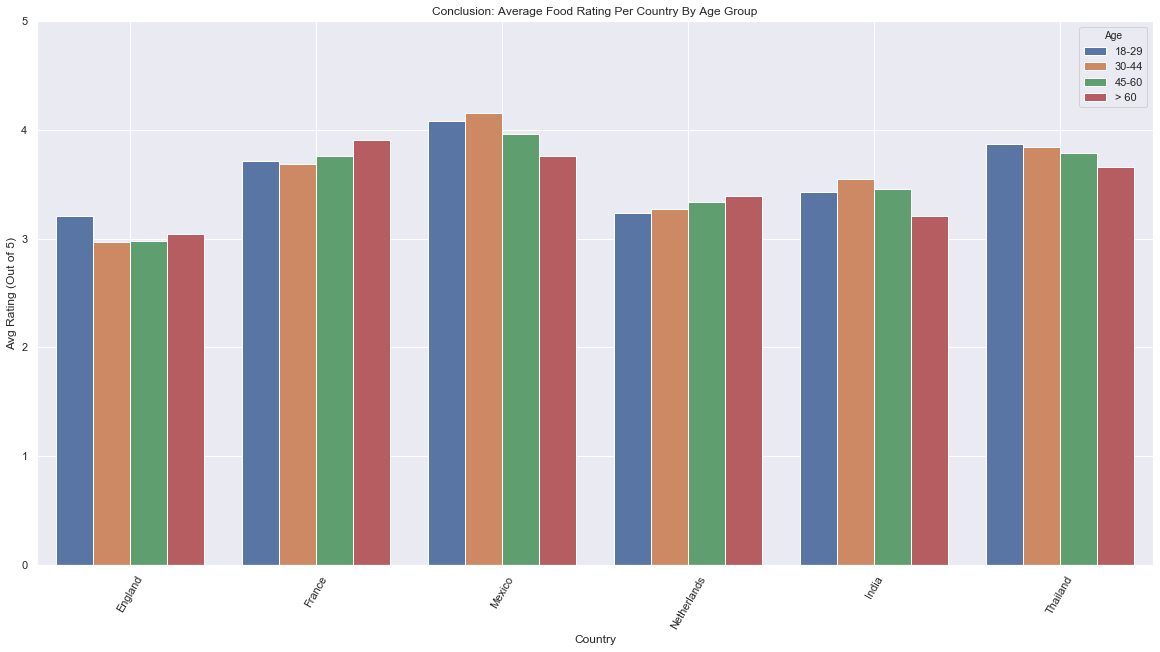

In [9]:
plt.figure(figsize = (20,10))
plot_age_conclusion = sns.barplot(x = age_conclusion['Country'], y = age_conclusion['Avg Rating (Out of 5)'], hue = age_conclusion['Age'])
loc, labels = plt.xticks()
plot_age_conclusion.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_age_conclusion.set(ylim=(0,5))
plot_age_conclusion.set_title("Conclusion: Average Food Rating Per Country By Age Group")
plot_age_conclusion

_I had the idea that traveling would lead a person to rate the country's food they traveled to higher than if they hadn't traveled there and had authentic food is what I focused on next. Traveling is at least somewhat (I would argue it is very) correlated with a higher level of income. So, my hypothesis was that as the income bracket group goes up in dollar value, the average food rating for countries that are frequently regarded as travel destinations would have higher ratings. Unfortunately, while I was able to see this trend in a few cases (Italy, France, and Spain while the other countries showed the opposite of my hypthesis), there were also two main travel destinations that had the opposite trend. This was a dissapointing result, however it was expected as I thought more about the many different factors that contribute and the assumption I made that travelers would enjoy the foods they try._

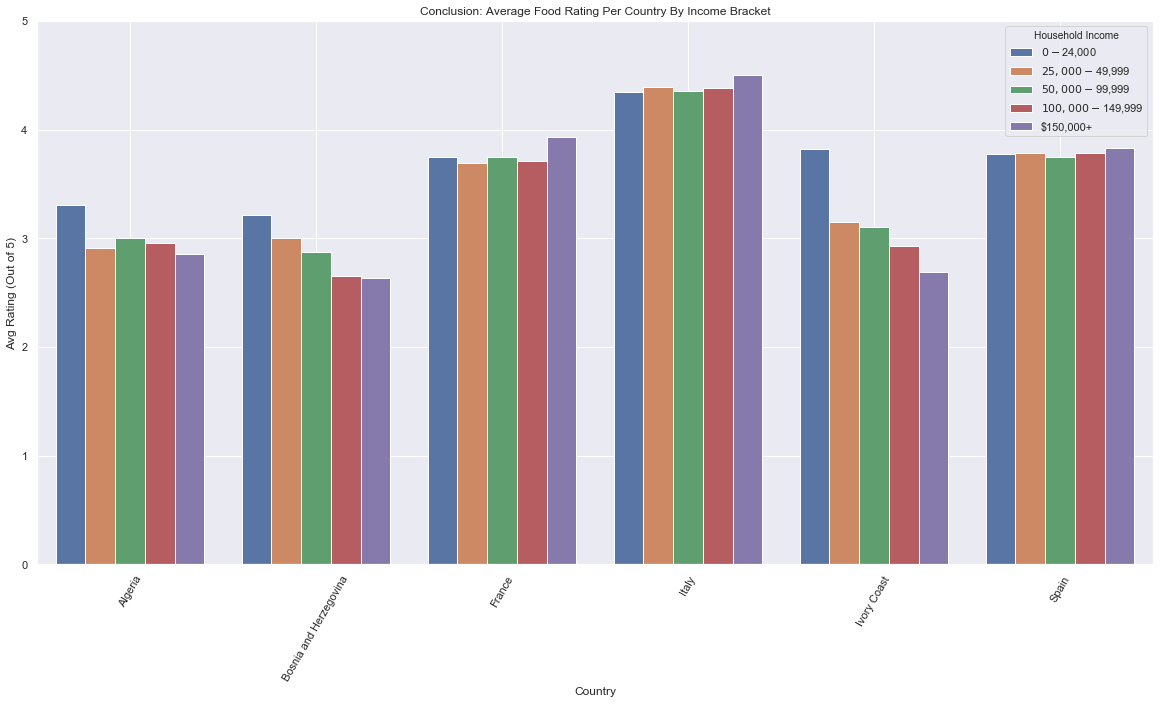

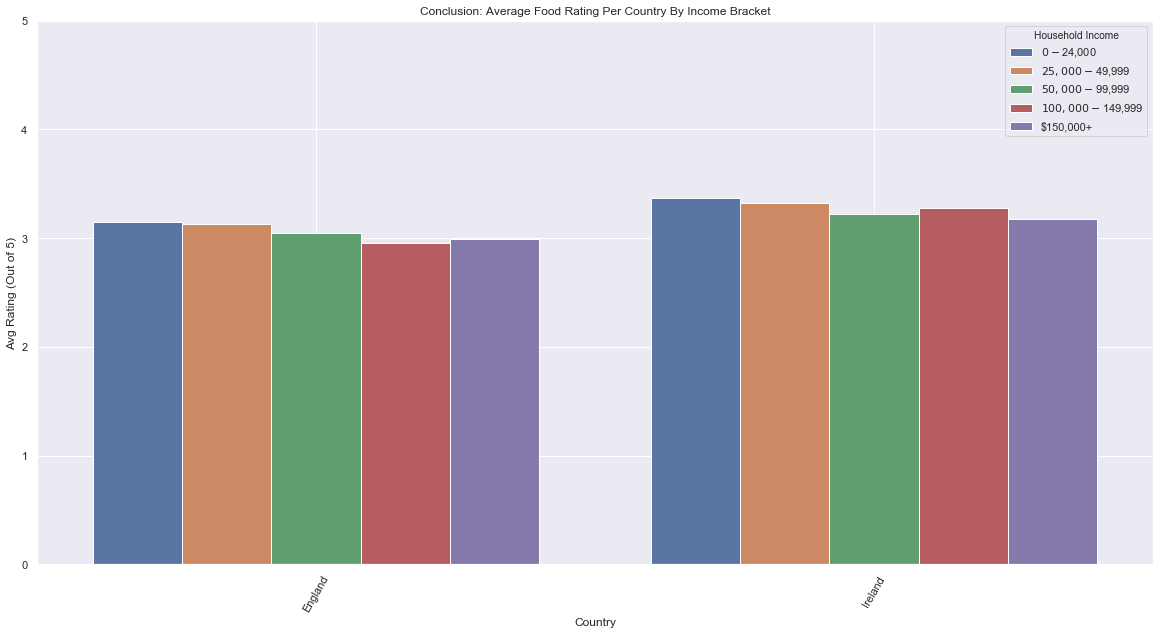

In [10]:
plt.figure(figsize = (20,10))
plot_income_conclusion = sns.barplot(x = income_conclusion['Country'], y = income_conclusion['Avg Rating (Out of 5)'], hue = income_conclusion['Household Income'])
loc, labels = plt.xticks()
plot_income_conclusion.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_income_conclusion.set(ylim=(0,5))
plot_income_conclusion.set_title("Conclusion: Average Food Rating Per Country By Income Bracket")
plot_income_conclusion

plt.figure(figsize = (20,10))
plot_income_opposite = sns.barplot(x = income_opposite['Country'], y = income_opposite['Avg Rating (Out of 5)'], hue = income_opposite['Household Income'])
loc, labels = plt.xticks()
plot_income_opposite.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_income_opposite.set(ylim=(0,5))
plot_income_opposite.set_title("Conclusion: Average Food Rating Per Country By Income Bracket")
plot_income_opposite

_My final question had to do with the region of the US that the person rating the countries is from. My hypothesis is that regions that are closer (distance-wise) to certain regions of the world would have higher average ratings for those countries than other US regions would. I focused on the Pacific region of the US and looked at the average ratings of Asian countries: China, Japan, and Vietnam; the West South Central region of the US and looked at the average ratings of Hispanic countries: Mexico, Brazil, and Chile; and the New England region of the US and looked at the average ratings of the European countries: England, Italy, and Ireland. I was a little bit dissapointed with the outcome of this analysis, as I was hoping to see some more definite trends than I did. Overall it was fairly inconclusive, and I think I could have improved this study by doing it based on the actual population of people who are either immigrants from certain countries or their ancestors immigrated from those countries. I think that trend would have been very strong, but much harder to put all of that data together in the form of this project._

Text(0.5, 1.0, 'Conclusion: Average Food Rating Per Country By New England Region')

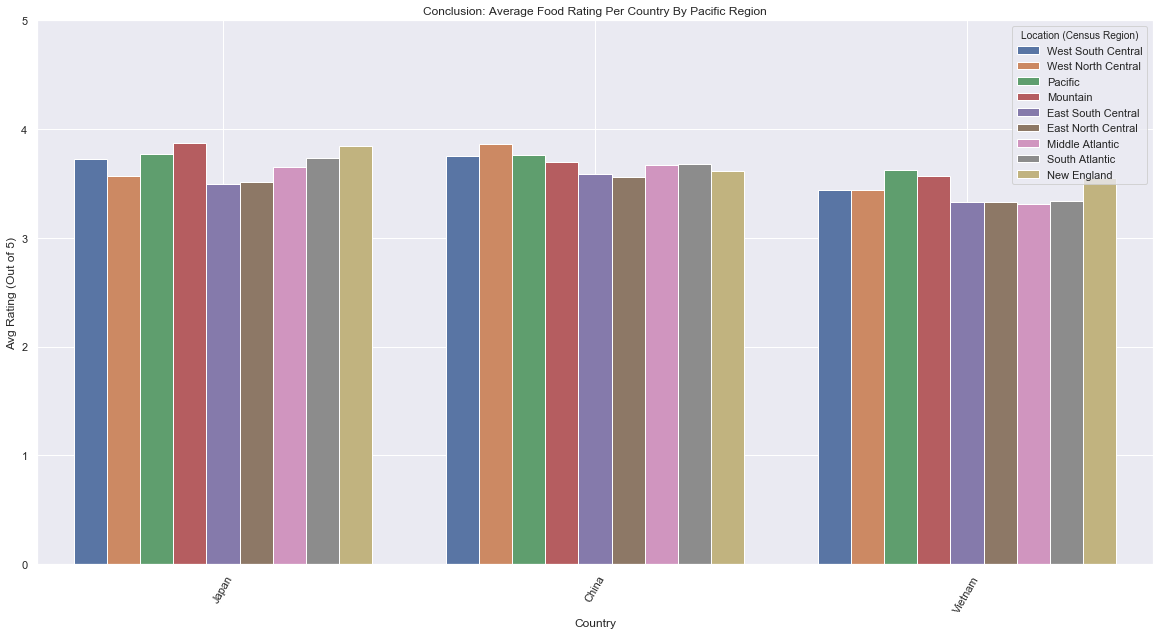

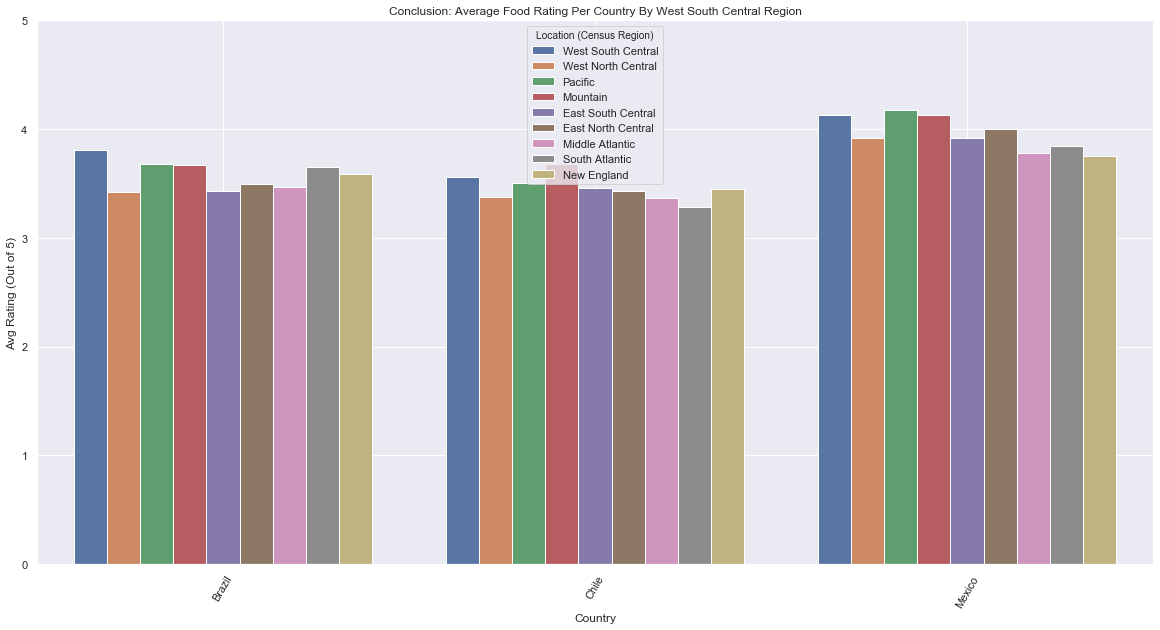

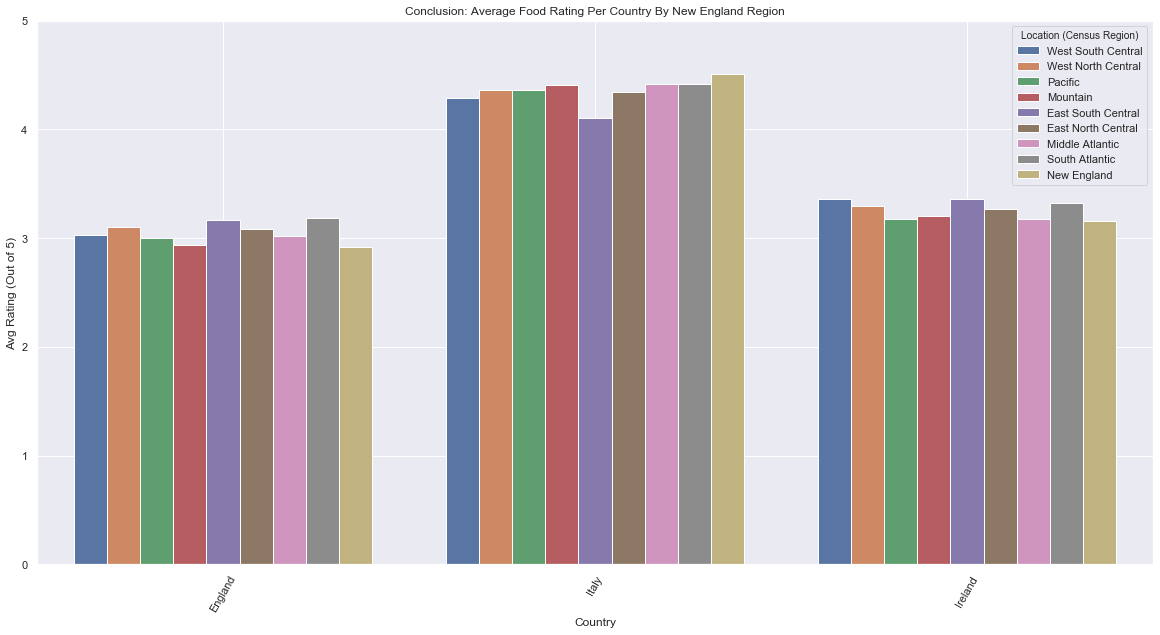

In [12]:
plt.figure(figsize = (20,10))
plot_region_pacific = sns.barplot(x = region_conclusion_pacific['Country'], y = region_conclusion_pacific['Avg Rating (Out of 5)'], hue = region_conclusion_pacific['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_pacific.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_pacific.set(ylim=(0,5))
plot_region_pacific.set_title("Conclusion: Average Food Rating Per Country By Pacific Region")

plt.figure(figsize = (20,10))
plot_region_wsc = sns.barplot(x = region_conclusion_wsc['Country'], y = region_conclusion_wsc['Avg Rating (Out of 5)'], hue = region_conclusion_wsc['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_wsc.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_wsc.set(ylim=(0,5))
plot_region_wsc.set_title("Conclusion: Average Food Rating Per Country By West South Central Region")

plt.figure(figsize = (20,10))
plot_region_ne = sns.barplot(x = region_conclusion_ne['Country'], y = region_conclusion_ne['Avg Rating (Out of 5)'], hue = region_conclusion_ne['Location (Census Region)'])
loc, labels = plt.xticks()
plot_region_ne.set_xticklabels(labels, rotation = 60)
plt.grid()
plot_region_ne.set(ylim=(0,5))
plot_region_ne.set_title("Conclusion: Average Food Rating Per Country By New England Region")

## Discussion and Conclusion

_In regards to my questions... Gender: overall they were fairly similar, but it can be said that on average men rated Bosnia and Herzegovina's food .75 points higher than women did, and on average women rated Nigeria's food 2.5 points higher than men did. Age: there was evidence (not conclusive) to support my hypothesis that as a person
s age group gets older, on average, they rate countries with traditionally flavorful/spicier foods lower. Income: there was no true evidence to support my hypothesis regarding travel destinations, as there were a few decent trends to be seen but there were contradictory trends as well. Region: similar to age, there was some evidence but it is not necessarily conslusive, and the evidence is fairly handpicked and may not be true for all US and world regions._ 

_Overall, this was a very interested dataframe to analyze and I learned a lot about seaborn plots while I tested with different types before deciding on the grouped barplot. I also learned a lot about pandas dataframes and dictionaries, and how to make my own from scratch. While, I initially wanted to do regression analysis, and ran into some issues with the data as it is all ratings of either 0,1,2,3,4 or 5 and the other questions are all categorical where I would need to create dummy variables, I think the analysis still turned out well and is fairly imformative._

### References

_King, Ritchie. “Fivethirtyeight: Food World Cup Data.” GitHub, 2014, github.com/fivethirtyeight/data/blob/master/food-world-cup/food-world-cup-data.csv._

_jayko03jayko031, and jezraeljezrael 438k3535 gold badges482482 silver badges530530 bronze badges. “Seaborn Multiple Variables Group Bar Plot.” Stack Overflow, 1 May 1968, stackoverflow.com/questions/49505456/seaborn-multiple-variables-group-bar-plot._

_B, Samdare. “Different Ways to Create Pandas Dataframe.” GeeksforGeeks, 14 Nov. 2018, www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/._

